In [55]:
# Import all necesary packages and libraries 
from json import JSONDecodeError
import requests
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np

Media Data:
Media ID: 18013314199769788
Media Type: IMAGE
Media URL: https://scontent.cdninstagram.com/v/t51.29350-15/369169963_944690173273976_164820808347549626_n.jpg?_nc_cat=107&ccb=1-7&_nc_sid=8ae9d6&_nc_ohc=TFawuJ1p8MMAX-g0eU1&_nc_ht=scontent.cdninstagram.com&edm=AL-3X8kEAAAA&oh=00_AfAoggiDOA5ecbqkUlx0rgabnPU61sMLQAsAybtj_0bwSA&oe=64F1E73C
Caption: Information is only powerful once accessed.
Timestamp: 2023-08-21T13:45:44+0000
Caption Sentiments: positive
Comments:
- Play your part
Comments Sentiments: neutral
    Replies Sentiments:  [[]]
- Sharing is caring
Comments Sentiments: neutral
    Replies Sentiments:  [[], []]
Likes: 5
Comment Counts: 2
Total Engagements: 7
--------------------------

Media ID: 17871242314788623
Media Type: IMAGE
Media URL: https://scontent.cdninstagram.com/v/t51.29350-15/105990660_3002047319832981_3547706877008675002_n.jpg?_nc_cat=106&ccb=1-7&_nc_sid=8ae9d6&_nc_ohc=ucTlwTCTLywAX-_T0GE&_nc_ht=scontent.cdninstagram.com&edm=AL-3X8kEAAAA&oh=00_AfCKpq6SeVf5

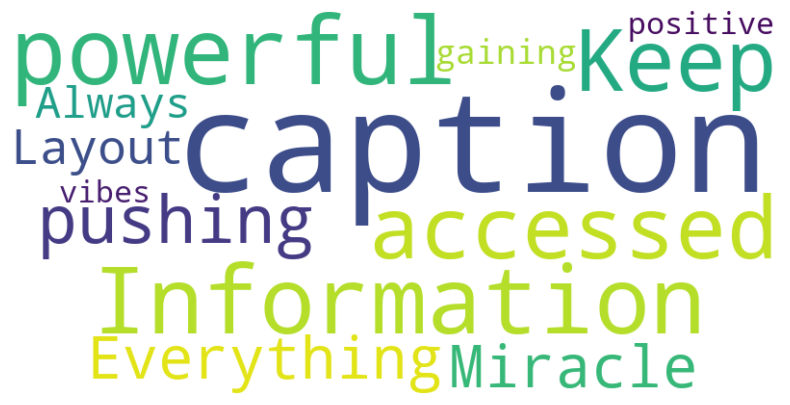

Comments Sentiments
[]                        4
['neutral', 'neutral']    2
['neutral']               1
['positive']              1
Name: count, dtype: int64

Pie Chart


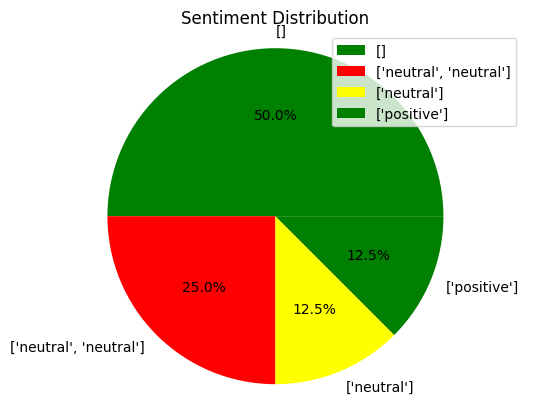


Histogram

Tagged media:

Media ID: 18073395025396196
Media Type: IMAGE
Media URL: https://scontent.cdninstagram.com/v/t51.29350-15/370966008_254595007500840_7897544977095278640_n.jpg?_nc_cat=100&ccb=1-7&_nc_sid=8ae9d6&_nc_ohc=GWZIwRkcq-cAX-GTUdp&_nc_ht=scontent.cdninstagram.com&edm=AJ7ooaQEAAAA&oh=00_AfCj_X2a3WOs3cxoevEHD7umlyrobKtgH3w1R1jywSF0Gw&oe=64F0C2C6
Caption: shapisy good ideas right💯
Timestamp: 2023-08-28T09:02:15+0000
--------------------

Tagged media data saved to tagged_media.csv
Media ID: 17971068032371692
Media Type: IMAGE
Media URL: https://scontent.cdninstagram.com/v/t51.29350-15/370828579_1418269838737513_3084160236583737495_n.jpg?_nc_cat=102&ccb=1-7&_nc_sid=8ae9d6&_nc_ohc=5VvTfEdLUQ8AX-1eaIf&_nc_ht=scontent.cdninstagram.com&edm=AJ7ooaQEAAAA&oh=00_AfCJhIMLgyLHxnLYaC4YrQeuRI008cxpByw7AuMPpcM5ug&oe=64F243C7
Caption: Do you remember the game?
Timestamp: 2023-08-28T09:05:09+0000
--------------------

Tagged media data saved to tagged_media.csv

Mention comments

API req

In [56]:
# Instagram IDs
access_token = 'EAAMC8ERtLFABO5j5d4cTn5RGL5rAKu3nJBVe1E3yRjoxCJzkBG3ilK7rLBatjVDMAvjuDq8z2YqLIduDIu3rLsm6KovxZCSKzW2MhYIwApOcDAjsTdSZAjXPbtV3IwWpIlYupchbuDYFiSW0B1LgihiIbtgzwodhM61hnukanbgf8P587OySYQow8wi1a8IQZAbiEHb'
instagram_account_id = '17841406879294936'

# API endpoint URLs
base_url = 'https://graph.facebook.com/v17.0/'
media_url = f'{base_url}{instagram_account_id}/media'
insights_url = f'{base_url}{instagram_account_id}/insights'

# Parameters for the API requests
media_params = {
    'fields': 'id,media_type,media_url,caption,timestamp,comments{comment_count,replies{id,text}}',
    'access_token': access_token
}

insights_params = {
    'metric': 'impressions, reach, replies, likes, total_interactions, comments',
    'metric_type': 'total_value',
    'period': 'day',
    'access_token': access_token
}

def fetch_instagram_data():
    url = f'{base_url}{instagram_account_id}?fields=media.limit(10){{caption,media_type,media_url,timestamp,id}}&access_token={access_token}'
    response = requests.get(url)
    instagram_data = response.json()  # Parse the response content as JSON
    return instagram_data

def fetch_instagram_insights(media_id):
    insights_url = f'{base_url}{media_id}/insights'
    response = requests.get(insights_url, params=insights_params)
    data = response.json()
    return data

# Function to get comments for a specific media ID
def get_comments(media_id):
    comments_url = f'{base_url}{media_id}/comments?access_token={access_token}'
    response = requests.get(comments_url)
    data = response.json()
    return data

# Function to get comment IDs for a specific media ID
def get_comment_ids(media_id):
    comments_endpoint = f'{base_url}{media_id}/comments?fields=id'
    response = requests.get(comments_endpoint)
    data = response.json().get('data', [])

    comment_ids = [comment.get('id') for comment in data]
    return comment_ids

# Function to get replies for a specific comment ID
def get_replies_for_comment(comment_id):
    replies_endpoint = f'{base_url}{comment_id}/replies?fields=username,text,like_count'
    response = requests.get(replies_endpoint)
    data = response.json().get('data', [])
    return data

# Function to get comment count for a specific media ID
def get_comment_count(media_id):
    comments_url = f'{base_url}{media_id}/comments?access_token={access_token}'
    response = requests.get(comments_url)
    data = response.json()
    return len(data.get('data', []))  # Return the length of the 'data' list


# Function to get likes for a specific media ID
def get_likes(media_id):
    likes_url = f'{base_url}{media_id}/insights?metric=engagement&access_token={access_token}'
    response = requests.get(likes_url)
    data = response.json()

    # Check for errors in the response
    if 'error' in data:
        error_message = data['error']['message']
        print("Likes Response Error: ", error_message,":", "No likes for this caption")
        return None  # Return None to indicate error

    return data

def fetch_tagged_media(instagram_account_id, access_token):
    tagged_media_url = f'{base_url}{instagram_account_id}/tags'
    params = {
        'access_token': access_token,
        'fields': 'id,media_type,media_url,caption,timestamp',
        'limit': 10  # You can adjust the limit as needed
    }

    response = requests.get(tagged_media_url, params=params)
    if response.status_code == 200:
        data = response.json()

        tagged_media = data.get('data', [])
        if tagged_media:
            for media in tagged_media:

                media_data = []
                media_id = media.get('id')
                media_type = media.get('media_type')
                media_url = media.get('media_url')
                caption = media.get('caption')
                timestamp = media.get('timestamp')

                media_data.append({
                    'Media ID': media_id,
                    'Media Type': media_type,
                    'Media URL': media_url,
                    'Caption': caption,
                    'Timestamp': timestamp
                })

                print("Media ID:", media.get('id'))
                print("Media Type:", media.get('media_type'))
                print("Media URL:", media.get('media_url'))
                print("Caption:", media.get('caption'))
                print("Timestamp:", media.get('timestamp'))
                print("--------------------")
                print()

                df = pd.DataFrame(media_data)
                df.to_csv('tagged_media.csv', index=False)
                print("Tagged media data saved to tagged_media.csv")

        else:
            print("No Tagged Media Found")
        
    else:
        print(f"API request failed with status code: {response.status_code}")
        print(response.text)
        return []
    
def get_mentioned_comments(instagram_account_id, access_token):
    mentioned_comment_url = f'{base_url}{instagram_account_id}'
    params = {
        'access_token': access_token,
        'fields': 'mentioned_comment{id,text,timestamp}',
        'limit': 10  # You can adjust the limit as needed
    }

    response = requests.get(mentioned_comment_url, params=params)
    if response.status_code == 200:
        data = response.json()

        mentioned_comments = data.get('mentioned_comment', [])
        if mentioned_comments:
            for comment in mentioned_comments:
                comment_id = comment.get('id')
                comment_text = comment.get('text', 'No Text')
                timestamp = comment.get('timestamp', 'No Timestamp')

                print("Comment ID:", comment_id)
                print("Comment Text:", comment_text)
                print("Timestamp:", timestamp)
                print("--------------------")
                print()
        else:
            print("No Mentioned Comments Found")
    else:
        print(f"API request failed with status code: {response.status_code}")
        print(response.text)
        return []
    
# Function to get mentioned media for a specific IG user
def get_mentioned_media(instagram_account_id):
    fields = 'mentioned_media'
    user_endpoint = f'{base_url}{instagram_account_id}?fields={fields}&access_token={access_token}'
    response = requests.get(user_endpoint)
    data = response.json().get('mentioned_media', [])
    return data

# Function to perform sentiment analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity # type: ignore
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

# Function to fetch and print media data
def get_media_data():
    response = fetch_instagram_data()
    extracted_data = []
    #print("Response Content:", response.text)
    try:
        #data = response.json()
        #if 'data' in response:
            for media in response['media']['data']:

                media_id = media['id']
                media_type = media['media_type']
                media_link = media['media_url']
                caption = media.get('caption', 'No caption')
                timestamp = media['timestamp']

                caption_sentiment = analyze_sentiment(caption)

                #Printing for texting
                print(f"Media ID: {media_id}")
                print(f"Media Type: {media_type}")
                print(f"Media URL: {media_link}")
                print(f"Caption: {caption}")
                print(f"Timestamp: {timestamp}")
                print(f"Caption Sentiments: {caption_sentiment}")

                # This allows you to access insights as per caption
                insights = fetch_instagram_insights(media_id)
                insights_data = insights.get('data', [{}])[0]

                likes_count = 0  # Initialize with a default value
                likes_data = get_likes(media['id'])
                if likes_data is not None:
                # Accessing likes count based on the returned data structure
                    likes_count = likes_data['data'][0]['values'][0]['value']

                comment_count = get_comment_count(media['id'])
        
                total_engagements = likes_count + comment_count

                # List to store sentiment scores for comments
                comment_sentiment = []

                comments_data = get_comments(media['id'])
                comment_ids = get_comment_ids(media['id'])
                comments_txt_list = [comment['text'] for comment in comments_data['data']]
                # ... Perform sentiment analysis on comments
                comment_sentiments = [analyze_sentiment(comment) for comment in comments_txt_list]

                replies_data_list = []
                replies_sentiments_list = []
                #comments_txt_list = []  # Create a list to store comments' text
                print("Comments:")
                for comment in comments_data['data']:
                    comment_txt = comment.get('comments', 'No Comments Found')
                    comment_sentiment = analyze_sentiment(comment_txt)
                    print("-", comment['text'])
                    print(f"Comments Sentiments: {comment_sentiment}")
                    #comments_txt_list.append(comment_txt)

                    # Extract replies to comments
                    replies_data = get_replies_for_comment(comment['id'])
                    for comment_id in comment_ids:
                        replies_data = get_replies_for_comment(comment_id)
                        print(f"    Replies for Comment ID {comment_id}:")
                        for reply in replies_data:
                            reply_text = reply.get('text', 'No text')
                            print(f"   Reply:", reply_text)
                        print()
                    
                    # ... Perform sentiment analysis on replies
                    replies_sentiments = [analyze_sentiment(reply) for reply in replies_data]
                    replies_sentiments_list.append(replies_sentiments)
                    print("    Replies Sentiments: ", replies_sentiments_list)
                    
                    # Perform sentiment analysis on replies
                    for reply_text in replies_data:
                        # Perform sentiment analysis using TextBlob
                        blob = TextBlob(reply_text)
                        sentiment_score = blob.sentiment.polarity
                        replies_sentiments_list.append(sentiment_score)
                        

                extracted_data.append({
                    'Media ID': media_id,
                    'Media Type': media_params,
                    'Media URL': media_link,
                    'Caption': caption,
                    'Timestamp': timestamp,
                    'Caption Sentiment': caption_sentiment,
                    'Likes': likes_count,
                    'Comments': comments_txt_list,
                    'Comments Sentiments': comment_sentiments,
                    'Comment Count': comment_count,
                    'Replies': replies_data_list,
                    'Replies Sentiments': replies_sentiments_list,
                    'Total Engagements': total_engagements
                })

                print(f"Likes: {likes_count}")
                #print(f"Replies Sentiment: {replies_sentiments_list}")
                print(f"Comment Counts: {comment_count}")
                print(f"Total Engagements: {total_engagements}")
                print("--------------------------")
                print()

            df = pd.DataFrame(extracted_data)
            df.to_csv('instagram_data.csv', index=False)
        #else:
            #print("No media data available.")

    except JSONDecodeError as e:
        print("JSON Decode Error:", e)
        print("Response Content:", response.text)

# Function to fetch and print insights data
def get_insights_data():
    response = requests.get(insights_url, params=insights_params)
    print("Response Content:", response.text)
    try:
        data = response.json().get('data', [])
        if 'data' in data:
            for insight in data['data']:
                if 'period_start' in insight:
                    print(f"Date: {insight['period_start']}")
                    for metric, value in insight['values'][0].items():
                        print(f"{metric.capitalize()}: {value}")
                    print("--------------------------")
                #else:
                 #   print("Error: 'period_start' key not found in insight data")
                print(f"Name: {insight['name']}")
                print(f"Period: {insight['period']}")
                print(f"Title: {insight['title']}")
                print(f"Description: {insight['description']}")
                print(f"Total Value: {insight['total_value']['value']}")
                print(f"ID: {insight['id']}")
                print("-" * 50)

        else:
            print("No media data available.")

    except JSONDecodeError as e:
        print("JSON Decode Error:", e)
        print("Response Content:", response.text)

# Function to plot a word cloud
def plot_wordcloud(text_list):
    if not text_list:
        print("No data to generate WordCloud from")
        return
    
    text = ' '.join(text_list)
    if text:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
    else:
        print("Error occured while printing worldcloud")

# Function to plot pie chart
def plot_pie_chart(data, labels, title):
    plt.pie(data, labels=labels, autopct='%1.1f%%', colors=['green', 'red', 'yellow'])
    plt.title(title)
    plt.axis('equal')
    plt.legend()
    plt.show()

# Function to plot histogram
def plot_histogram(data, bins, title, x_label, y_label):
    plt.hist(data, bins=bins, color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.broken_barh
    plt.legend()
    plt.show()

# Function to fetch captions and perform sentiment analysis
def get_sentiment_data():
    response = requests.get(media_url, params=media_params)
    data = response.json()
    captions = [media['caption'] for media in data['data'] if 'caption' in media]
    sentiment_data = {'positive': 0, 'negative': 0, 'neutral': 0}
    
    for caption in captions:
        sentiment = analyze_sentiment(caption)
        sentiment_data[sentiment] += 1

    return sentiment_data

if __name__ == "__main__":
    print("Media Data:")
    get_media_data()

    print("\nInsights Data:")
    get_insights_data()

    sentiment_data = get_sentiment_data()
    print("\nSentiment Analysis:")
    print(sentiment_data)

     # Plotting WordCloud for captions and replies
    captions = pd.read_csv('instagram_data.csv')['Caption'].tolist()
    replies = pd.read_csv('instagram_data.csv')['Replies Sentiments'].sum()
    
    print("\nWordCloud for Captions:")
    # Check if caption list is not empty
    if captions:
        plot_wordcloud(captions)
    else:
        print("No captions to generate WordCloud from")

    #print("\nWordCloud for Replies:")
    # Check if replies list is not empty
    #if replies:
     #   plot_wordcloud(replies)
    #else:
     #    print("No replies to generate WordCloud from")

    sentiment_data = pd.read_csv('instagram_data.csv')['Comments Sentiments'].value_counts()
    print(sentiment_data)

    print("\nPie Chart")
    plot_pie_chart(sentiment_data, sentiment_data.index, title='Sentiment Distribution')

    print("\nHistogram")
    #plot_histogram()

    print("\nTagged media:")
    print()
    fetch_tagged_media(instagram_account_id, access_token)

    print("\nMention comments")
    print()
    get_mentioned_comments(instagram_account_id, access_token)

    mentioned_media_data = get_mentioned_media(instagram_account_id)

    if mentioned_media_data:
        print("Mentioned Media Data:")
        for media in mentioned_media_data:
            media_id = media.get('id', 'No ID')
            media_caption = media.get('caption', 'No Caption')
            media_type = media.get('media_type', 'Unknown Type')
            print(f"Media ID: {media_id}, Caption: {media_caption}, Type: {media_type}")
    else:
        print("Mentioned Media Data:")
        print(" No mentions available")
    
        